!pip install gensim

In [130]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random 
import pprint

Lets import our text document

In [16]:
myfile = open(r"Assignment 7 Document.txt")
document = myfile.read()

#### Preprocessign data

In [83]:
#Converting data to lower text

document_lower = document.lower()

In [84]:
#Replacing numbers with space
pattern = '[0-9]'
text = re.sub(pattern,'', document_lower)

In [85]:
#replacing multiple white spaces with single white space

text = re.sub('\s+',' ',text)

In [86]:
clean_text = text.replace('\n', '')

In [87]:
#Now we will remove all punctuation from sting

punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'

file_cleaned = text.translate(str.maketrans('','',punctuations))

In [88]:
file_cleaned

'i got married when i was to a man that by all accounts wasnt bad but he wasnt good for me. long story short i was married to a loser. he didnt necessarily do anything wrong he just didnt do anything at all. now i am not a typical woman if there even is such a thing. i love myself. sure there are things i want to improve but i dont have a problem with my age or intelligence or what my body looks like or my personality those things that seem to stereotypically plague women just dont bother me for whatever reason. i have a career where i make more than enough money on my own to live comfortably. i know how to use power tools fix my own car and google the shit out of anything else that needs to be done. i say what i mean and expect others to do the same none of this passiveaggressive nonsense. but im stubborn as a mule and marriages are supposed to last so even though i was the primary breadwinner and did most of the things around the house and raised my kids mostly on my own i still spen

Here we can see in our text we are having double dots, so lets remove dots

In [89]:
punctuations = '..'

file_cleaned = file_cleaned.replace('..', '')

In [90]:
file_cleaned

'i got married when i was to a man that by all accounts wasnt bad but he wasnt good for me. long story short i was married to a loser. he didnt necessarily do anything wrong he just didnt do anything at all. now i am not a typical woman if there even is such a thing. i love myself. sure there are things i want to improve but i dont have a problem with my age or intelligence or what my body looks like or my personality those things that seem to stereotypically plague women just dont bother me for whatever reason. i have a career where i make more than enough money on my own to live comfortably. i know how to use power tools fix my own car and google the shit out of anything else that needs to be done. i say what i mean and expect others to do the same none of this passiveaggressive nonsense. but im stubborn as a mule and marriages are supposed to last so even though i was the primary breadwinner and did most of the things around the house and raised my kids mostly on my own i still spen

In [92]:
#Now lets convert out string to token

sentences = sent_tokenize(file_cleaned)

In [94]:
#Now converting into word token

tokenize_word = [word_tokenize(sentence) for sentence in sentences]

In [97]:
#Now lets remove stopwords from out data

for i in range(len(tokenize_word)):
    tokenize_word[i] = [word for word in tokenize_word[i] if word not in stopwords.words()]

In [116]:
# Training the Word2Vec model
model = Word2Vec(tokenize_word, min_count=1)

words = model.wv.vocab

In [136]:
#Here we are displaying 5 most similar words for 20 random tokens


pp = pprint.PrettyPrinter(indent=4)

for i in range(21):
    key, val = random.choice(list(words.items())) 
    similar_words = model.wv.most_similar(key,topn=5)
    print("Top 5 similar words for token = ",key)
    print("")
    pp.pprint(similar_words)
    print("----------------------------------------------------")

Top 5 similar words for token =  wrong

[   ('need', 0.2976277768611908),
    ('literally', 0.27023783326148987),
    ('played', 0.25629371404647827),
    ('actual', 0.24841740727424622),
    ('supposed', 0.23826253414154053)]
----------------------------------------------------
Top 5 similar words for token =  upsetting

[   ('crap', 0.29156947135925293),
    ('problem', 0.25668972730636597),
    ('simple', 0.24369414150714874),
    ('partner', 0.2376573383808136),
    ('bear', 0.22204408049583435)]
----------------------------------------------------
Top 5 similar words for token =  lost

[   ('neighbors', 0.32645025849342346),
    ('turd', 0.3212553560733795),
    ('nonsense', 0.28194156289100647),
    ('left', 0.2626723051071167),
    ('well', 0.24009980261325836)]
----------------------------------------------------
Top 5 similar words for token =  leave

[   ('needing', 0.3472345769405365),
    ('ive', 0.2782272398471832),
    ('friend', 0.2731744050979614),
    ('pictures', 0.26

#Now lets Plot 2D graph to see words similarity of at least 20 words



In [168]:
#Getting random 20 words from dictionary

vocab = []

for i in range(21):
    key, val = random.choice(list(words.items())) 
    vocab.append(key)

In [169]:
vocab

['woke',
 'childs',
 'struggles',
 'say',
 'live',
 'false',
 'thick',
 'emotionally',
 'apologized',
 'literally',
 'gave',
 'home',
 'kissed',
 'family',
 'lot',
 'set',
 'ridiculous',
 'get',
 'empty',
 'wrong',
 'whatever']

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


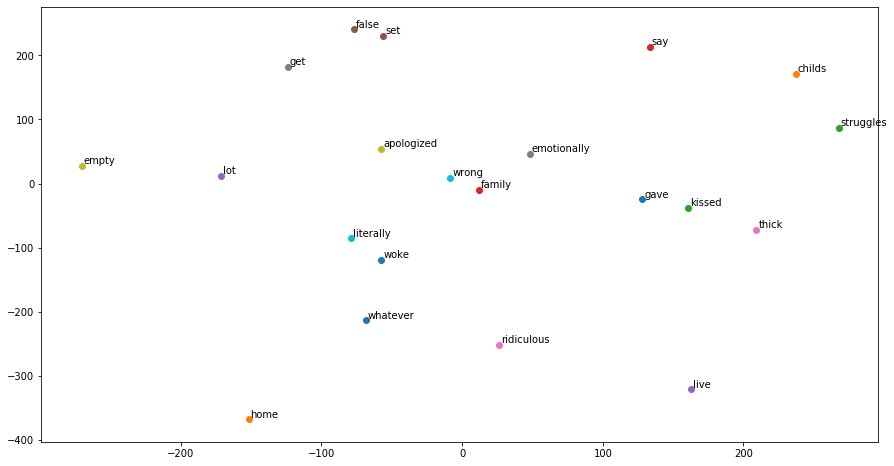

In [170]:
#Now lets plot 2D graph

from sklearn.manifold import  TSNE
def tsne_plot(model,vocab):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model,vocab)

Here we can see similarity of words with each other, kissed is near to gave, wrong is very similar to family and apologized. Struggles and childs

In [171]:
#Creating a new vocab manually

vocab = ['married','story','woman','love','age','intelligence','body','career','money','power','stubborn','house','kids','husband','friend','struggled','emotional','pregnancy','crazy','brilliant']

In [172]:
len(vocab)

20

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


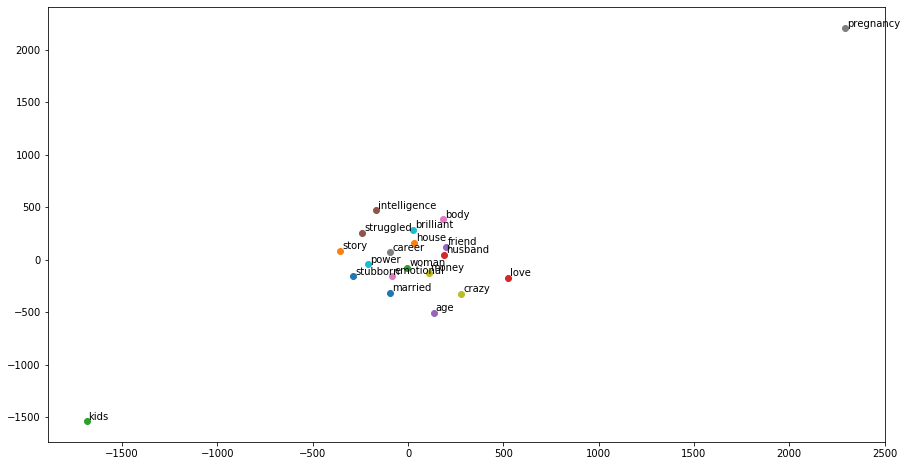

In [173]:
tsne_plot(model,vocab)